# Lập trình thống kê cơ bản

# Ước tính cỡ mẫu cho hệ số tương quan

### BS. Lê Ngọc Khả Nhi

# Dẫn nhập

Khảo sát tương quan là một quy trình rất thông dụng trong nghiên cứu Y học, do đây cũng là một phần trong hệ thống mục tiêu của nghiên cứu, nó cũng cần được xét cùng với những mục tiêu khác khi ta ước tính cỡ mẫu. Trong bài thực hành ngắn hôm nay, Nhi sẽ hướng dẫn các bạn lập trình thủ công trong Python để ước tính cỡ mẫu cho phân tích tương quan.

Đối tượng của việc ước tính cỡ mẫu lần này là hệ số tương quan tuyến tính r theo Pearson (hay rho theo Spearman), với giả thuyết vô hiệu là: giá trị của r = 0 (không có tương quan)

$$H_0∶\ r\ =\ 0$$

Và đối thuyết: giá trị của r khác 0 một cách có ý nghĩa 

$$H_1:\ r\ \neq\ 0$$

Công thức tính cỡ mẫu như sau:

$$n\ =\ \left(\frac{Z_{1\ -\ \alpha/2}\ +\ Z_{1\ -\ \beta}}{0.5\ \times\ ln\left(\frac{1\ +\ r}{1\ -\ r}\right)}\right)^2+\ 3$$

Với:

1) n là cỡ mẫu cần ước tính,

2) r là giá trị tuyệt đối của hệ số tương quan, r dao động từ 0 đến 1

3) Z là bách phân vị của phân phối chuẩn hóa.

4) $\alpha$ là sai lầm loại I

5) $\beta$ là sai lầm loại II, tương ứng ta có lực thống kê (statistical power) = $1 - \beta$

Ghi chú: mẫu số của công thức là phép hoán chuyển Z của Fisher (arctanh của r), cho phép kiểm định thống kê giá trị của r

# Viết hàm ước tính cỡ mẫu 

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
def sample_correlation(r: float, alpha = 0.05, beta = 0.2):
    '''@args: 
    r là 1 số thập phân trong khoảng 0,1
    alpha: sai lầm type 1, giá trị mặc định = 0.05
    beta: sai lầm type 1, giá trị mặc định = 0.2
    @ Output: Cỡ mẫu N
    '''
    Za = norm.ppf(1-alpha/2)
    Zb = norm.ppf(1-beta)
    N = ((Za + Zb)/(0.5 * np.log((1+r)/(1-r))))**2 + 3
    
    return N

Áp dụng cho 1 trường hợp:

In [3]:
sample_correlation(r = 0.45, alpha = 0.05, beta = 0.2)

36.408819944595685

# Mô phỏng nhiều giả định khác nhau

Tuy nhiên, trên thực tế ta không ước tính cỡ mẫu cho 1 giả định duy nhất, đặc biệt cho bài toán phân tích tương quan đa biến, vì ta sẽ có rất nhiều giá trị r để ước tính, và không biết trước mỗi giá trị sẽ thay đổi trong khoảng từ bao nhiêu đến bao nhiêu. Do đó, ta cần mô phỏng kết quả cho tất cả những giá trị có thể của r

Nhi viết 1 hàm để vẽ biểu đồ mô phỏng sự thay đổi của N tùy theo giá trị beta, và cho tất cả giá trị r nằm trong 1 khoảng rmin, rmax:

In [4]:
def simul_cor_sample(rmin, rmax, betas:list):
    
    rs = np.linspace(rmin, rmax, num=100)
    
    fig, ax = plt.subplots(figsize=(8,8))
    fig.suptitle('Hệ số tương quan r')
    ax.set_ylabel('Cỡ mẫu cần thiết')
    ax.set_xlabel('Hệ số tương quan r')
    
    for b in betas:
        sample = [sample_correlation(r = r, alpha = 0.05, beta = b) for r in rs]
        ax.plot(rs, sample, label = f'power: {1-b}')
        ax.legend()
    
    plt.show()

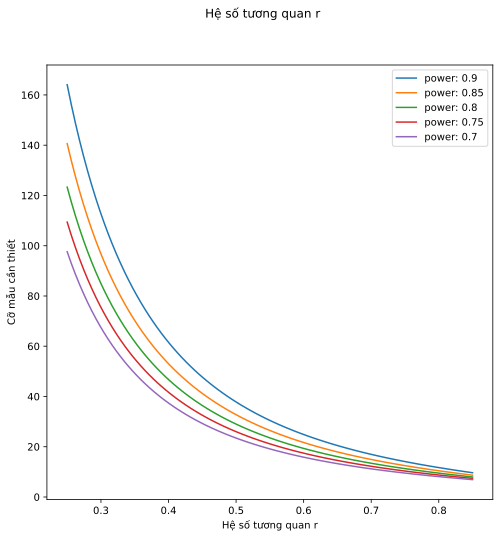

In [5]:
simul_cor_sample(0.25, 0.85, betas = [0.1,0.15,0.2,0.25,0.3])

Để diễn giải kết quả, ta cần kết hợp thêm giá trị cỡ mẫu ước tính từ những mục tiêu khác, thí dụ So sánh trung bình 2 phân nhóm mà bài trước Nhi đã có làm, vì hiếm khi phân tích tương quan là mục tiêu duy nhất.

Thí dụ nếu ta đã ước tính được cỡ mẫu là 60 cho 1 mục tiêu khác, có thể đối chiếu giá trị 60 lên biểu đồ mô phỏng và thấy: với N = 60, có thể đảm bảo statistical power = 0.8 và alpha = 0.05 cho bất cứ giá trị r nào trong khoảng từ 0.35 đến 0.85.